In [25]:
import pandas as pd

file_path="/content/drive/MyDrive/Social_Network_Ads.csv"
df= pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
#check shape
df.shape

(400, 5)

In [27]:
#check data types and null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [28]:
# Check data types

print("\nData Types:")
print(df.dtypes)


Data Types:
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


OBSERVATION:

No anomoly seen in data types.

In [29]:
# Display the number of unique values for each column
unique_counts = df.nunique()
print(unique_counts) #all score columns are continuous


User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


OBSERVATION:

Based on the number of unique values, numerical columns can be categorized as following:

continuous: Age, EstimatedSalary
discete   : Purchased

categorcal: Gender

In [30]:
# Show unique values for each column
categorical_cols = df.select_dtypes(exclude=['number'])
print(categorical_cols)

     Gender
0      Male
1      Male
2    Female
3    Female
4      Male
..      ...
395  Female
396    Male
397  Female
398    Male
399  Female

[400 rows x 1 columns]


In [31]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)   # all good


Column: User ID
[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 15706185 1578986

OBSERVATION:

No odd values fund in categorical columns that need correction

In [32]:
# duplicate in data set
df.duplicated().sum()

np.int64(0)

In [33]:
#overview of missing values

df.isnull().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


OBSERVATION:

No missing values found.

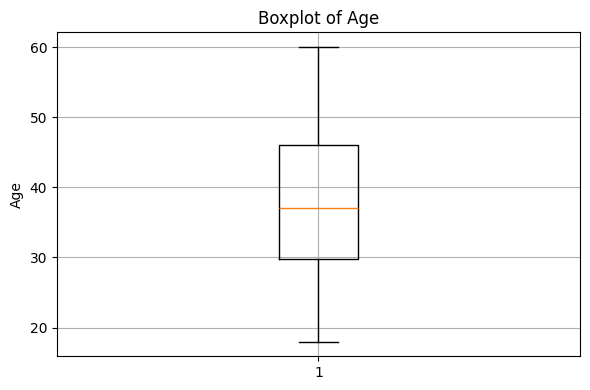

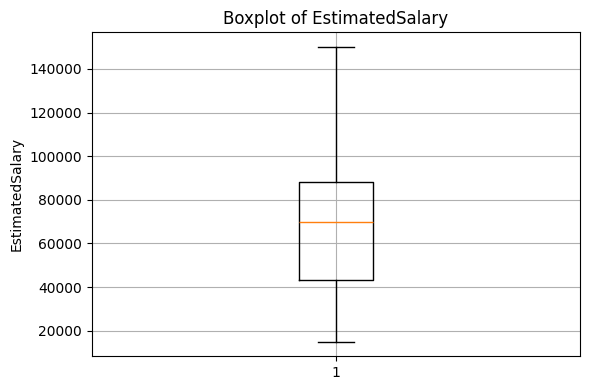

In [34]:
#outliers

import matplotlib.pyplot as plt

continuous_cols = ['Age','EstimatedSalary']

# Plot boxplots in a loop
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

OBSERVATION:

No outliers found.

In [35]:
# encode categorical features

categorical_cols = df.select_dtypes(exclude=['number'])
print(categorical_cols)

     Gender
0      Male
1      Male
2    Female
3    Female
4      Male
..      ...
395  Female
396    Male
397  Female
398    Male
399  Female

[400 rows x 1 columns]


In [36]:
# nominal : gender                         -> one-hot encoding
            #purchased                     -> already binary



OBSERVATION:

Sincebgender is nominal, needs one-hot encodng.


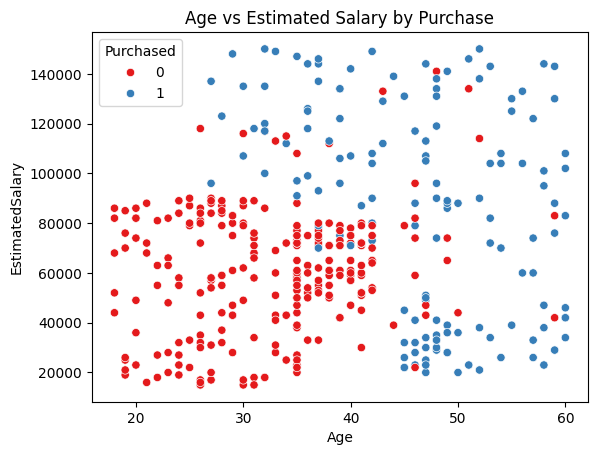

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Age vs Estimated Salary colored by Purchased
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='Set1')
plt.title('Age vs Estimated Salary by Purchase')
plt.show()


OBSERVATION:
Out of the first 10 samples:
Only 1 person purchased the product.
That person is:
Age: 32, Salary: 150,000
The rest of the users (with ages ranging from 19 to 35, and salaries from 19k to 84k) did not purchase the product.

CONCLUSION:
Higher salaries may correlate with purchasing behavior:
The only buyer had the highest salary (150,000) in this subset.
Users with lower salaries (<85,000) didn’t purchase, even at similar ages.
Age alone may not be a strong predictor:
People aged 27 (three times) didn’t purchase despite varying salaries.
A younger person with high salary might still purchase (not confirmed from this small sample).
Income appears more influential than age (at least initially).


MODEL PRE OBSERVATIONS:

Classifiers should be able to learn a pattern where high salary increases purchase probability.
Decision Trees may split first on salary thresholds.
KNN might classify high-income points closer to the "Purchased" class.

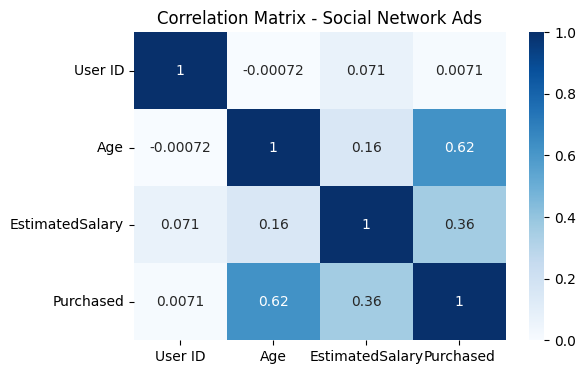

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix - Social Network Ads")
plt.show()


OBSERVATION:

Age (0.62) – Strong Positive Correlation
Older users are significantly more likely to purchase.
Age is the most influential predictor in this dataset.

Estimated Salary (0.36) – Moderate Positive Correlation
Users with higher salaries tend to purchase more, but the effect is less pronounced than Age.

Gender (-0.04) – Negligible Correlation
Gender has virtually no impact on purchase behavior.
Also shows little correlation with Age and Salary, indicating independence.

CONCLUSION:

Primary Predictors: Age and Estimated Salary are the main drivers of purchase decisions.

Model Implication: Focus on these numeric features; models like KNN and Decision Trees are likely to capture their effects well.

Scatter Plot Insight: Likely shows higher purchase density at higher Age and Salary values, with some overlap near decision boundaries.

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop User ID
df.drop('User ID', axis=1, inplace=True)

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Features and Target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize Age and Salary
sc = StandardScaler()
X[['Age', 'EstimatedSalary']] = sc.fit_transform(X[['Age', 'EstimatedSalary']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<ipython-input-40-d4653d38cd7c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'EstimatedSalary']] = sc.fit_transform(X[['Age', 'EstimatedSalary']])


In [41]:
# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, X_test, y_test, "Naive Bayes")

# 2. K-Nearest Neighbors (k=3,5,7)
for k in [3, 5, 7]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    evaluate_model(knn_model, X_test, y_test, f"KNN (k={k})")

# 3. Decision Tree (Gini)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
evaluate_model(dt_gini, X_test, y_test, "Decision Tree (Gini)")

# 4. Decision Tree (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
evaluate_model(dt_entropy, X_test, y_test, "Decision Tree (Entropy)")



📊 Naive Bayes Evaluation:
Accuracy : 0.93
Precision: 0.9411764705882353
Recall   : 0.8648648648648649
F1 Score : 0.9014084507042254
Confusion Matrix:
 [[61  2]
 [ 5 32]]
----------------------------------------

📊 KNN (k=3) Evaluation:
Accuracy : 0.91
Precision: 0.868421052631579
Recall   : 0.8918918918918919
F1 Score : 0.88
Confusion Matrix:
 [[58  5]
 [ 4 33]]
----------------------------------------

📊 KNN (k=5) Evaluation:
Accuracy : 0.92
Precision: 0.8717948717948718
Recall   : 0.918918918918919
F1 Score : 0.8947368421052632
Confusion Matrix:
 [[58  5]
 [ 3 34]]
----------------------------------------

📊 KNN (k=7) Evaluation:
Accuracy : 0.93
Precision: 0.875
Recall   : 0.9459459459459459
F1 Score : 0.9090909090909091
Confusion Matrix:
 [[58  5]
 [ 2 35]]
----------------------------------------

📊 Decision Tree (Gini) Evaluation:
Accuracy : 0.84
Precision: 0.8
Recall   : 0.7567567567567568
F1 Score : 0.7777777777777778
Confusion Matrix:
 [[56  7]
 [ 9 28]]
----------------------

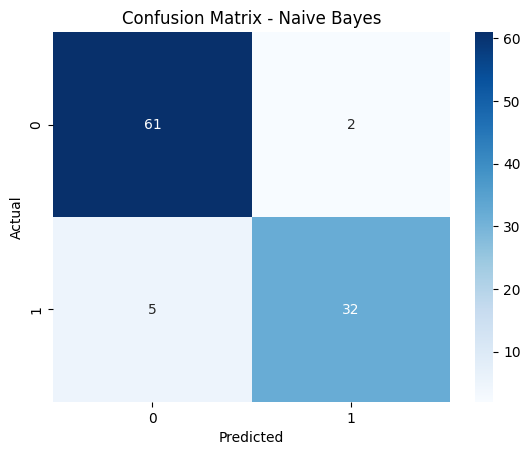

In [42]:
def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example for Naive Bayes
plot_conf_matrix(nb_model, X_test, y_test, "Naive Bayes")


Model Performance Summary

Best Model: KNN (k=7)

Accuracy: 0.93 | Precision: 0.875 | Recall: 0.946 | F1-score: 0.909
Strong balance between precision and recall.
Confusion Matrix: 2 false negatives, 5 false positives — excellent performance.

Naive Bayes:-

Accuracy: 0.93 | Precision: 0.94 | Recall: 0.865 | F1-score: 0.901
Slightly better at minimizing false positives but misses more actual purchasers.
Good alternative for simplicity and speed.


KNN (k=3 and k=5):

Lower accuracy and F1-score than k=7.
Performance improves as k increases, showing better generalization with k=7.


Decision Tree (Gini & Entropy):

Accuracy: ~0.84 | Precision: 0.80 | Recall: 0.757 | F1-score: 0.778
More false predictions (9 false negatives, 7 false positives).
Likely overfitting or less effective with continuous features.


Conclusion:

KNN (k=7) is the most effective model, balancing precision and recall with high accuracy.
Naive Bayes is a strong and efficient alternative.
Decision Trees underperform and may require tuning or additional data.
Models handling continuous features (Age, Salary) like KNN and Naive Bayes outperform Decision Trees.

